In [76]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

#read in speeches
df = pd.read_csv('speeches_rev.csv')

# Sentiment analysis pipeline
nlp = pipeline(task='text-classification', model='nickwong64/bert-base-uncased-finance-sentiment')

# Define a function to apply sentiment analysis to each speech
def analyze_sentiment(speech):
    # Limit the maximum length of the input sequence to avoid errors
    max_length = 512 
    truncated_text = speech[:max_length]
    
    result = nlp(truncated_text)
    return result[0]['label'], result[0]['score']

# Apply sentiment analysis to the "speech" column and create new columns for sentiment label and score
df[['sentiment_label', 'score']] = df['speech'].apply(analyze_sentiment).apply(pd.Series)

# Display the DataFrame with sentiment information
print(df)




      id        date                         name  year  \
0      1  2023-07-22          HE Haitham Al Ghais  2023   
1      2  2023-06-26          HE Haitham Al Ghais  2023   
2      3  2023-05-22          HE Haitham Al Ghais  2023   
3      4  2022-11-16          HE Haitham Al Ghais  2022   
4      5  2022-07-05  HE Mohammad Sanusi Barkindo  2022   
..   ...         ...                          ...   ...   
332  333  2003-09-11    Dr. Alvaro Silva-Calderón  2003   
333  334  2003-09-08    Dr. Alvaro Silva-Calderón  2003   
334  335  2003-08-21    Dr. Alvaro Silva Calderón  2003   
335  336  2003-07-25    Dr. Alvaro Silva Calderón  2003   
336  337  2003-07-09    Dr. Alvaro Silva Calderón  2003   

                                                header  \
0                    Remarks by OPEC Secretary General   
1                    Address by OPEC Secretary General   
2                    Address by OPEC Secretary General   
3    OPEC Statement to the UN Climate Change Confer...   
4

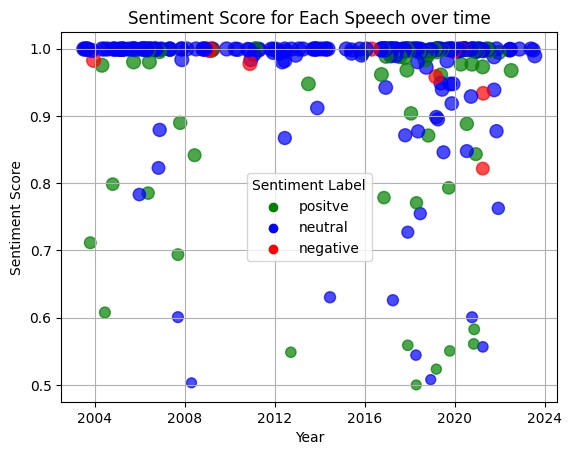

In [87]:
#plot the results
df['date'] = pd.to_datetime(df['date'])  # Convert 'year' to datetime format


colors = {'positve': 'green', 'neutral': 'blue', 'negative': 'red'}

# Use a default color (gray) for values not recognized in 'colors'
df['color'] = df['sentiment_label'].map(lambda x: colors.get(x, 'gray'))

# Size the points based on the sentiment score
sizes = df['score'] * 100  # You can adjust the multiplier to scale the size

# Scatter plot with color-coded labels and legend
for label, color in colors.items():
    plt.scatter([], [], color=color, label=label)

plt.scatter(df['date'], df['score'], c=df['color'], s=sizes, marker='o', alpha=0.7)
plt.title('Sentiment Score for Each Speech over time')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.legend(title='Sentiment Label')
plt.grid(True)
plt.savefig('pretrained_sentiment.png')
plt.show()

In [89]:
negative_speeches = df[df['sentiment_label'] == 'negative']

# count negative speeches
print(negative_speeches[['speech', 'score', "year"]])

                                                speech     score  year
17   Dear distinguished Members and Observers of th...  0.933764  2021
21   Excellencies,\n\n One year ago, we were on the...  0.821771  2021
55   Excellencies,\n\n Since the OPEC Ministerial C...  0.999633  2020
62   Your Royal Highness,\nExcellencies,\nLadies an...  0.999184  2020
66   Excellencies, ladies and gentlemen,\n\n Buenos...  0.996255  2019
100  \nExcellencies, Ladies and gentlemen,\nIt is a...  0.958527  2019
191  [SLIDE 1]\nExcellencies, ladies and gentlemen,...  0.999533  2016
232  Ladies and gentlemen, it gives me great pleasu...  0.978022  2010
239  Excellencies, ladies and gentlemen,I would lik...  0.999430  2009
242  Thank you, Mr. Chairman.\n Ladies and gentleme...  0.999357  2009
243  [Session: Financial Crisis Impact on Energy Ou...  0.997605  2009
244  Excellencies, ladies and gentlemen,\n Let me b...  0.999620  2008
298  Vienna, 2 December 2005 \n Excellencies, ladie...  0.541684  2005
326  E

In [ ]:
prices = pd.read_csv('speeches_rev.csv')
